# Análisis de Delitos Cometidos en la Ciudad de Buenos Aires (2023)
## En este análisis, trabajaremos con un dataset que registra los delitos cometidos en la Ciudad de Buenos Aires durante el año 2023. El objetivo principal es explorar los datos, identificar patrones y obtener información relevante que pueda ayudar a comprender mejor el comportamiento delictivo en la ciudad.
## El conjunto de datos incluye información detallada sobre cada hecho delictivo registrado. Cada fila representa un evento y contiene las siguientes columnas: 
- Identificación del caso: Un identificador único para cada delito.
- Fecha: Año, mes, y día en el que ocurrió el hecho delictivo.
- Hora: Franja horaria en la que se registró el delito.
- Tipo de delito: Categoría principal del delito (por ejemplo, robo, hurto, etc.).
- Subtipo de delito: Descripción más específica del delito (por ejemplo, robo con violencia, hurto simple, etc.).
- Uso de arma: Indicador de si se utilizó un arma en el delito (Sí/No).
- Uso de moto: Indicador de si se utilizó una moto durante el hecho delictivo (Sí/No).
- Barrio y comuna: Ubicación geográfica donde ocurrió el delito, dividida por barrios y comunas.
- Ubicación: Latitud y longitud donde ocurrió el delito.
- Cantidad de eventos: Número de eventos delictivos registrados en una misma fecha y lugar.

## Herramientas Utilizadas
- Python y librerias: pandas, numpy, matplotlib, seaborn, folium.
- Jupyter Notebook para documentar y ejecutar el análisis paso a paso.
- Dataset: Archivo CSV que contiene los registros de delitos.

# EXPLORACIÓN DE DATOS
La propuesta de hoy es definir el dataset y comenzar con la Exploración
- Ver los primeros y últimos registros
- Ver el tamaño del Dataset
- Ver las columnas
- Ver los tipos de datos

## A la hora de cargar un archivo csv pueden aparecer algunos incovenientes. Los parametros del metodo 'read_csv' resuelven este problema



### read_csv(parametros)
- ruta: "delitos_2023.csv"
- sep: indica el delimitador "," o ";" u otro caracter 
- encoding:  codificacion del contenido al español
- on_bad_lines:  ignorar filas que causan errores
- nrows: leer a partir de una fila en particular


In [1]:
# Importar librerias
import pandas
import matplotlib.pyplot as plt
import seaborn 
import folium
import re
from wordcloud import WordCloud as ww
# Leer dataset. Aplicar filtros de ser necesario.
df = pandas.read_csv("delitos_2023.csv", sep = ';')

In [2]:
# Imprimir registros
df.sample(3)

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
495,496,2023,JULIO,VIERNES,14/7/2023,6,Vialidad,Lesiones por siniestros viales,NO,NO,PUERTO MADERO,1,NaN,NaN,1
27253,27254,2023,SEPTIEMBRE,SÁBADO,9/9/2023,10,Amenazas,Amenazas,NO,NO,VILLA SOLDATI,8,-34665710,-58440627,1
63406,63407,2023,OCTUBRE,LUNES,23/10/2023,14,Robo,Robo total,NO,NO,RECOLETA,CC-02,"-34,588138","-58,392385",1


In [3]:
# Informar el tamaño del data set
dimension = df.shape
print(f"El archivo 'delitos_2023', contiene {dimension[0]} registros y {dimension[1]} columnas")

El archivo 'delitos_2023', contiene 157461 registros y 15 columnas


In [4]:
# Informar las columnas del archivo
columnas = df.columns
print("Columnas:")
for col in columnas:
    print(f"{col}", end="\t")

Columnas:
id-sum	anio	mes	dia	fecha	franja	tipo	subtipo	uso_arma	uso_moto	barrio	comuna	latitud	longitud	cantidad	

In [5]:
# Informar los tipo de datos de los registros
tDatoColumas = df.dtypes
print("Tipo de Datos Columnas:")
for tdc in tDatoColumas:
    print(f"{tdc}", end="\t")

Tipo de Datos Columnas:
int64	int64	object	object	object	int64	object	object	object	object	object	object	object	object	int64	

In [6]:
# Mostrar los numeros de ocurrencias de los subtipos de delitos
df['subtipo'].value_counts()

subtipo
Robo total                        64079
Hurto total                       58073
Lesiones Dolosas                  11045
Lesiones por siniestros viales    10339
Amenazas                           8332
Hurto automotor                    4494
Robo automotor                      904
Muertes por siniestros viales       104
Homicidio Doloso                     91
Name: count, dtype: int64

In [7]:
# Mostrar las estadisticas de la franja horaria
df['franja'].describe()

count    157461.000000
mean         12.951766
std           6.410010
min           0.000000
25%           8.000000
50%          13.000000
75%          18.000000
max          23.000000
Name: franja, dtype: float64

# LIMPIEZA DE DATOS
La propuesta de hoy es avanzar en la limpieza de datos del dataset elegido:
- Revisar si hay datos nulos y definir si llevar a cabo una estrategia 

In [8]:
# Se modifican las columnas
columnas = df.columns
df.columns = columnas.str.title()
df.columns

Index(['Id-Sum', 'Anio', 'Mes', 'Dia', 'Fecha', 'Franja', 'Tipo', 'Subtipo',
       'Uso_Arma', 'Uso_Moto', 'Barrio', 'Comuna', 'Latitud', 'Longitud',
       'Cantidad'],
      dtype='object')

In [9]:
# Se visualizan las columnas con datos nulos y se procede a tomar una decisión.
for col in df.columns:
    print(f"La columna '{col}' tiene {df[col].isnull().sum()} datos nulos de {df.shape[0]}")

La columna 'Id-Sum' tiene 0 datos nulos de 157461
La columna 'Anio' tiene 0 datos nulos de 157461
La columna 'Mes' tiene 0 datos nulos de 157461
La columna 'Dia' tiene 0 datos nulos de 157461
La columna 'Fecha' tiene 0 datos nulos de 157461
La columna 'Franja' tiene 0 datos nulos de 157461
La columna 'Tipo' tiene 0 datos nulos de 157461
La columna 'Subtipo' tiene 0 datos nulos de 157461
La columna 'Uso_Arma' tiene 0 datos nulos de 157461
La columna 'Uso_Moto' tiene 0 datos nulos de 157461
La columna 'Barrio' tiene 682 datos nulos de 157461
La columna 'Comuna' tiene 666 datos nulos de 157461
La columna 'Latitud' tiene 2819 datos nulos de 157461
La columna 'Longitud' tiene 2819 datos nulos de 157461
La columna 'Cantidad' tiene 0 datos nulos de 157461


## Estrategia: Limpiar datos nulos.
### Estos datos no seran tenidos en cuenta para continuar con el análisis: Conforman menos del 2% de los datos.
- La columna 'Barrio' tiene 682 datos nulos de 157461
- La columna 'Comuna' tiene 666 datos nulos de 157461
- La columna 'Latitud' tiene 2819 datos nulos de 157461
- La columna 'Longitud' tiene 2819 datos nulos de 157461


In [10]:
# Filtrar y crear un nuevo dataframe
df_filtrado = df[(df['Comuna'].notnull()) & (df['Barrio'].notnull()) & (df['Latitud'].notnull()) & (df['Longitud'].notnull())]
df_filtrado.shape

(154348, 15)

### Se analiza la información contenida en cada una de las columnas del dataset, para eliminar incoherencias de algún tipo.

In [11]:
# Visualizar con el metodo unique() los distintos tipos de valores que contienen estas columnas.
# La columna 'Id-Sum' no presenta dificultades para realizar análisis.
# La columna 'Anio' no presenta dificultades para realizar análisis. 
# La columna 'Mes' no presenta dificultades para realizar análisis.
# La columna 'Dia' presenta dificultades para realizar análisis. Aparecen dias escritos con tilde y otro sin tilde. Se opta por modificar aquellos con tilde.
# La columna 'Fecha' no presenta dificultades para realizar análisis.. 
# La columna 'Franja' no presenta dificultades para realizar análisis. 
# La columna 'Tipo' y 'Subtipo'no presentan dificultades para realizar análisis. 
# La columna 'Uso_Arma' y 'Uso_Moto' no presenta dificultades para realizar análisis. 
# La columna 'Barrio' presenta dificultades para realizar análisis. Aparecen barrios con nombres no identificados("0").
# La columna 'Comuna' no presenta dificultades para realizar análisis. 
# La columna 'Latitud' y 'Longitud' presentan dificultades para realizar análisis. Hay campos con latitudes y longitudes con 0 grados.
# La columna 'Cantidad' no presenta dificultades para realizar análisis. 

### Limpiando columna Dia

In [12]:
# Visualizamos los valores posibles para esta columna.
df_filtrado.Dia.unique()

array(['LUNES', 'MIERCOLES', 'VIERNES', 'MARTES', 'JUEVES', 'DOMINGO',
       'SABADO', 'SÁBADO', 'MIÉRCOLES'], dtype=object)

In [13]:
# Visualizamos el dataframe con estos valores. 
condicionDias = (df_filtrado['Dia'] == 'MIÉRCOLES')|(df_filtrado['Dia'] == 'SÁBADO')
df_filtrado[condicionDias].sample(3)

,Id-Sum,Anio,Mes,Dia,Fecha,Franja,Tipo,Subtipo,Uso_Arma,Uso_Moto,Barrio,Comuna,Latitud,Longitud,Cantidad
24941,24942,2023,MAYO,SÁBADO,20/5/2023,8,Amenazas,Amenazas,NO,NO,BOCA,4,-34618686,-58355815,1
26873,26874,2023,AGOSTO,MIÉRCOLES,23/8/2023,14,Amenazas,Amenazas,NO,NO,VILLA DEVOTO,11,-34607234,-58516429,1
23179,23180,2023,MARZO,MIÉRCOLES,8/3/2023,22,Amenazas,Amenazas,NO,NO,BELGRANO,13,-34557698,-58449321,1


In [14]:
# Se reemplazan los dias con tilde por aquellos sin tilde
df_filtrado['Dia'] = df_filtrado['Dia'].replace({'MIÉRCOLES':'MIERCOLES', 'SÁBADO':'SABADO'})
df_filtrado.Dia.unique()

C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\2628544220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Dia'] = df_filtrado['Dia'].replace({'MIÉRCOLES':'MIERCOLES', 'SÁBADO':'SABADO'})


array(['LUNES', 'MIERCOLES', 'VIERNES', 'MARTES', 'JUEVES', 'DOMINGO',
       'SABADO'], dtype=object)

### Limpiando columna Barrio

In [15]:
# Visualizamos los valores posibles para esta columna.
df_filtrado.Barrio.unique()

array(['BELGRANO', 'VILLA LUGANO', 'SAAVEDRA', 'PARQUE CHACABUCO',
       'BALVANERA', 'RECOLETA', 'MONTE CASTRO', 'VILLA URQUIZA',
       'VILLA SOLDATI', 'NUEVA POMPEYA', 'BARRACAS', 'CHACARITA',
       'LINIERS', 'FLORES', 'PALERMO', 'FLORESTA', 'CONSTITUCION',
       'VILLA DEL PARQUE', 'BOEDO', 'MATADEROS', 'CABALLITO',
       'VELEZ SARSFIELD', 'VILLA PUEYRREDON', 'VILLA LURO',
       'PARQUE PATRICIOS', 'LA BOCA', 'VILLA DEVOTO', 'SAN TELMO',
       'VILLA CRESPO', 'VILLA RIACHUELO', 'COLEGIALES',
       'VILLA GRAL. MITRE', 'RETIRO', 'ALMAGRO', 'PARQUE AVELLANEDA',
       'SAN NICOLAS', 'PATERNAL', 'SAN CRISTOBAL', 'MONSERRAT',
       'VILLA ORTUZAR', 'NUÑEZ', 'PARQUE CHAS', 'BOCA', 'PUERTO MADERO',
       'VILLA REAL', 'VERSALLES', 'VILLA SANTA RITA', 'COGHLAN',
       'AGRONOMIA', 'GREGORIO DE LAFERRERE', 'FLORIDA', 'BERNAL',
       'DOCK SUD', '0', 'SANTA MARÍA', 'BANFIELD OESTE',
       'NO ESPECIFICADA', 'VILLA LUZURIAGA', 'CASEROS', 'NUNEZ',
       'VILLA GENERAL MITRE', 

In [16]:
# Se encuentran los barrios con hechos delictivos que no han sido identificados("0") y se omiten para realizar el analisis posterior.
condicionBarrio = df_filtrado['Barrio'] != '0'
df_filtrado = df_filtrado[condicionBarrio]
df_filtrado.sample(3)

,Id-Sum,Anio,Mes,Dia,Fecha,Franja,Tipo,Subtipo,Uso_Arma,Uso_Moto,Barrio,Comuna,Latitud,Longitud,Cantidad
122299,122300,2023,DICIEMBRE,VIERNES,15/12/2023,8,Robo,Robo total,NO,NO,CABALLITO,CC-06,"-34,616057","-58,439069",1
39760,39761,2023,SEPTIEMBRE,SABADO,2/9/2023,23,Hurto,Hurto total,NO,NO,VILLA LUGANO,CC-08,"-34,6828","-58,465715",1
59342,59343,2023,JUNIO,LUNES,26/6/2023,16,Hurto,Hurto total,NO,NO,VILLA PUEYRREDON,CC-12,"-34,58461994","-58,50968132",1


### Limpiando columnas Latitud y Longitud

In [17]:
# Omitimos las columnas con latitud y longitud de cero grados.
condicionLat = (df_filtrado['Longitud'] != '0') & (df_filtrado['Latitud'] != '0')
df_filtrado = df_filtrado[condicionLat]
df_filtrado.sample(3)

,Id-Sum,Anio,Mes,Dia,Fecha,Franja,Tipo,Subtipo,Uso_Arma,Uso_Moto,Barrio,Comuna,Latitud,Longitud,Cantidad
86181,86182,2023,ABRIL,MIERCOLES,5/4/2023,6,Robo,Robo total,NO,NO,NUEVA POMPEYA,CC-04,"-34,642816","-58,42888",1
91516,91517,2023,JULIO,LUNES,31/7/2023,4,Robo,Robo total,NO,SI,LINIERS,CC-09,"-34,63893","-58,521212",1
75132,75133,2023,SEPTIEMBRE,SABADO,9/9/2023,20,Robo,Robo total,NO,NO,COLEGIALES,CC-13,"-34,56961652","-58,45565327",1


In [18]:
# Informar el tamaño del data set
dimension = df_filtrado.shape
print(f"El dataset filtrado, contiene {dimension[0]} registros y {dimension[1]} columnas")

El dataset filtrado, contiene 153972 registros y 15 columnas


# VISUALIZACIONES

### ¿En qué mes, se presenta la mayor cantidad de hechos delictivos y de qué tipo?

<Axes: title={'center': 'Tipos de delitos por Mes'}, xlabel='Mes', ylabel='Cantidad de delitos'>

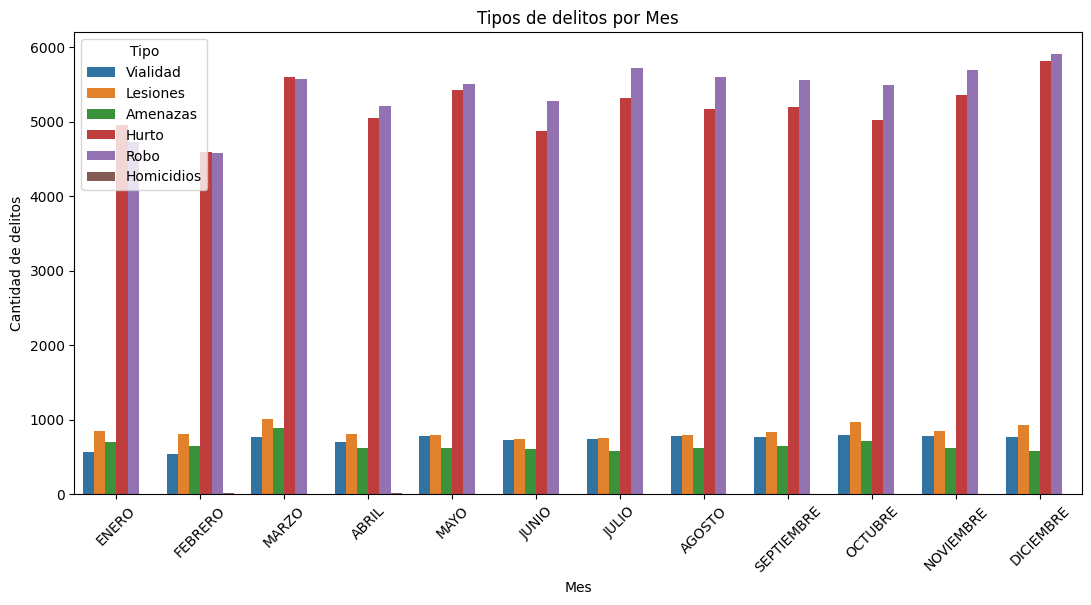

In [19]:
# Criterio de ordenación
meses = ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE',]
# Formateo y visualización
plt.figure(figsize=(13,6))
plt.ylabel("Cantidad de delitos")
plt.xticks(rotation = 45)
plt.title("Tipos de delitos por Mes")
seaborn.countplot(data = df_filtrado, x = 'Mes', hue='Tipo', order = meses)

### Resultados: Se puede demostrar que en todos los meses del año, los tipos de delitos Robo y Hurto han sido constantes en la Ciudad de BS.AS. Siendo Diciembre y Marzo aquellos meses en donde los porteños han sufrido más hechos de estos tipos.

### Con respecto a los tipos de delitos ¿Cuáles son los subtipos más cometidos?

(-0.5, 399.5, 199.5, -0.5)

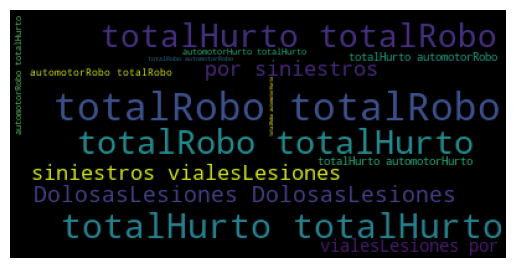

In [20]:
# Se visualiza en una nube de palabras los subtipos mas ocurridos.
texto = ""
texto = texto.join(df_filtrado['Subtipo'])
nube = ww().generate(texto)
plt.imshow(nube)
plt.axis('off')

### Resultados: Dentro de los tipos de delitos, se encuentran aquellos mas frecuentados 'Robo Total', 'Hurto Total', 'Lesiones Dolosas'.

### ¿En qué barrios se han frecuentado mas delitos?

<Axes: title={'center': 'Cantidad Delitos por Barrios y sus Tipos'}, xlabel='Cantidad', ylabel='Barrio'>

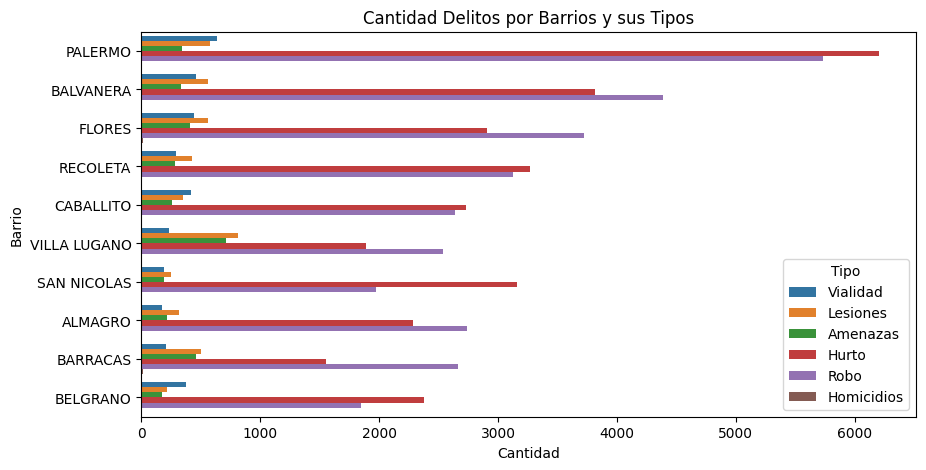

In [21]:
# Se registran los primeros 5 barrios con mas sucesos haciendo incapie en los subtipos de delitos.
plt.figure(figsize=(10,5))
plt.xlabel("Cantidad")
plt.title("Cantidad Delitos por Barrios y sus Tipos")
ordenBarrios = df_filtrado.Barrio.value_counts().index[:10]
seaborn.countplot(data = df_filtrado, y = 'Barrio', hue = 'Tipo', order=ordenBarrios)

### Resultado: Los tres barrios con más delitos ocurridos en el año 2023 son Palermo, Balvanera y Flores. 

### Visualizar delitos en Palermo
##### A continuación se realizan algunas operaciones para poder visualizar los delitos en el mapa de la ciudad de Buenos Aires.

In [22]:
# Se elige palermo por conveniencia al ser el lugar más inseguro.
condicionP = df_filtrado['Barrio'] == 'PALERMO'
df_palermo = df_filtrado[condicionP]

In [23]:
"""
Éste bloque de código pretende cambiar las latitudes y longitudes con formatos erróneos al sistema decimal correspondiente.
"""
def coordenadas(ubicacion):
    """
    Ésta función, coloca los caracteres '-' y '.'
    Ejemplo: lat/long:  3454541212 => -34.54541212
    """
    posicion = 2
    nubi = "-" + ubicacion[:posicion] + "." + ubicacion[posicion:]
    return nubi
    
def formatearUbicacion(ubicacion):
    """
    Ésta función, salvo los dígitos, elimina cualquier otro carácter.
    Ejemplo: lat/long:  -34,5454\n,1212 => 3454541212
    """
    nubi = re.sub(r'[^0-9]', '', ubicacion)
    return coordenadas(nubi)
# Se añaden nuevas columnas al dataframe palermo.
df_palermo['Nueva Latitud'] = df_palermo['Latitud'].apply(formatearUbicacion)
df_palermo['Nueva Longitud'] = df_palermo['Longitud'].apply(formatearUbicacion)

C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\2990166660.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_palermo['Nueva Latitud'] = df_palermo['Latitud'].apply(formatearUbicacion)
C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\2990166660.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_palermo['Nueva Longitud'] = df_palermo['Longitud'].apply(formatearUbicacion)


In [24]:
# Mostrar el nuevo dataset palermo.
df_palermo.sample(5)

,Id-Sum,Anio,Mes,Dia,Fecha,Franja,Tipo,Subtipo,Uso_Arma,Uso_Moto,Barrio,Comuna,Latitud,Longitud,Cantidad,Nueva Latitud,Nueva Longitud
74319,74320,2023,MAYO,LUNES,8/5/2023,22,Hurto,Hurto total,NO,NO,PALERMO,CC-14,"-34,568887","-58,447045",1,-34.568887,-58.447045
32758,32759,2023,OCTUBRE,SABADO,28/10/2023,14,Hurto,Hurto total,NO,NO,PALERMO,CC-14,"-34,588237","-58,411297",1,-34.588237,-58.411297
1637,1638,2023,AGOSTO,MIERCOLES,23/8/2023,14,Vialidad,Lesiones por siniestros viales,NO,NO,PALERMO,14,-34.583.459,-58.406.178,1,-34.583459,-58.406178
2987,2988,2023,ABRIL,VIERNES,7/4/2023,14,Vialidad,Lesiones por siniestros viales,NO,NO,PALERMO,14,-34565217,-58401603,1,-34.565217,-58.401603
47658,47659,2023,JULIO,SABADO,15/7/2023,8,Hurto,Hurto total,NO,NO,PALERMO,CC-14,"-34,57546162","-58,43598923",1,-34.57546162,-58.43598923


In [25]:
# Cambiar el tipo de dato de object a float de las nuevas columnas
df_palermo['Nueva Latitud'] = df_palermo['Nueva Latitud'].astype(float)
df_palermo['Nueva Longitud'] = df_palermo['Nueva Longitud'].astype(float)

C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\1689011267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_palermo['Nueva Latitud'] = df_palermo['Nueva Latitud'].astype(float)
C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\1689011267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_palermo['Nueva Longitud'] = df_palermo['Nueva Longitud'].astype(float)


In [26]:
# Eligimos una pequeña muestra para visualizar en el mapa.
df_palermo_ubi = df_palermo.sample(200)

In [27]:
# Formateamos el mapa con las latitudes y longitudes para limitar el area.
mapa_palermo = folium.Map(location=[
    df_palermo_ubi['Nueva Latitud'].mean(), 
    df_palermo_ubi['Nueva Longitud'].mean()
], zoom_start=14)

# Agregar marcadores en el mapa para cada delito
for _, row in df_palermo_ubi.iterrows():
    folium.Marker(
        location=[row['Nueva Latitud'], row['Nueva Longitud']],
        popup=f"Fecha: {row['Fecha']}\n Hora: {row['Franja']} hr. \t Tipo: {row['Tipo']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(mapa_palermo)

# Mostrar el mapa
mapa_palermo

### ¿En qué dias se han presentado mayores hechos delictivos?

C:\Users\Familia\AppData\Local\Temp\ipykernel_6264\3564330268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(data = df_filtrado, x = 'Dia', order = df_filtrado['Dia'].value_counts().index, palette=paletaDias, edgecolor="black")


<Axes: title={'center': 'Delitos por Dia'}, xlabel='Dia', ylabel='Cantidad de delitos'>

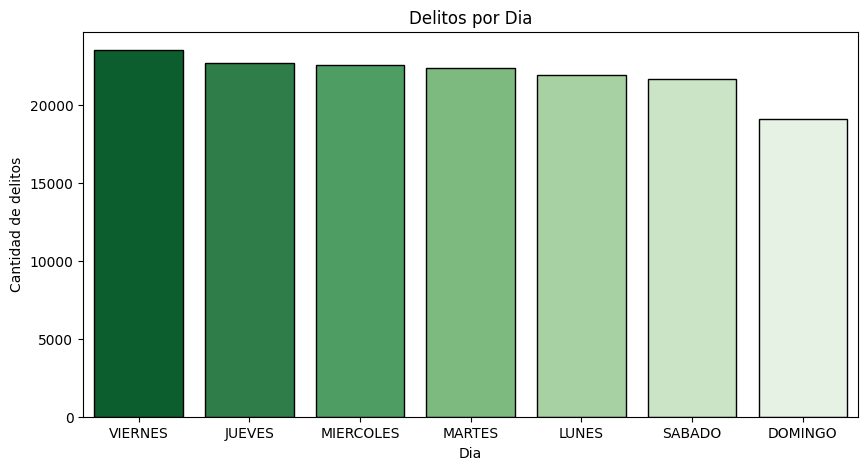

In [28]:
# Formateo y visualización
paletaDias = seaborn.color_palette('Greens', n_colors=7)
paletaDias.reverse()
plt.figure(figsize=(10,5))
plt.ylabel("Cantidad de delitos")
plt.title("Delitos por Dia")
seaborn.countplot(data = df_filtrado, x = 'Dia', order = df_filtrado['Dia'].value_counts().index, palette=paletaDias, edgecolor="black")

### Resultado: Se puede determinar que los dias viernes del año 2023 se han producido la mayor cantidad de delitos, bajando el contador los fines de semana.

### ¿Cuál ha sido el horario más frecuentado?

([<matplotlib.axis.XTick at 0xf637a4a150>,
 [Text(3, 0, 'Madrugada'),
  Text(9, 0, 'Mañana'),
  Text(15, 0, 'Tarde'),
  Text(20, 0, 'Noche')])

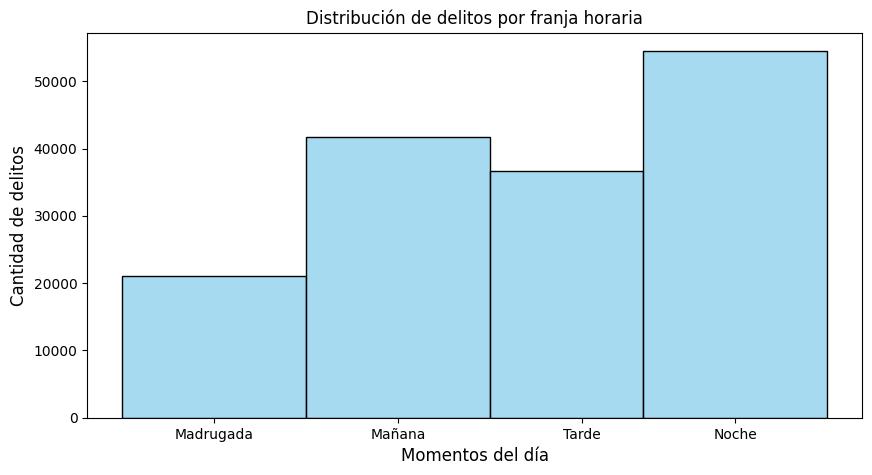

In [29]:
# Se visualizan los delitos en durante todo un dia
plt.figure(figsize=(10, 5))
seaborn.histplot(data=df_filtrado, x='Franja', bins=[0, 6, 12, 17, 23], color='skyblue', kde=False)
plt.xlabel('Momentos del día', fontsize=12)
plt.ylabel('Cantidad de delitos', fontsize=12)
plt.title('Distribución de delitos por franja horaria')
plt.xticks([3, 9, 15, 20], labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'])


### Resultado: Entre las 18-23hr se ve un incremento de delitos.